Cilt kanseri tespiti için bir makine öğrenimi modeli kuralım. Görüntü verileriyle modelin eğitilmesi, veri ön işleme, uygun model seçimi ve eğitimi süreçleri ele alınacak.

Pre-trained **MobileNet modeli**, ek katmanlarla ince ayar yapılarak **deri hastalıkları sınıflandırması** için kullanılıyor. Proje, veri hazırlığı, Keras ile modelin kurulması ve eğitilmesi adımlarını içeriyor. Sonuçlar, modelin doğruluğunu değerlendirme ile ölçülüyor.

**Veri setini anlama: MNIST HAM 10000**

Makine öğrenimi modelini eğitmek için MNIST HAM 10000 veri seti kullanıldı. Cilt kanseri türlerine göre etiketlenmiş toplam 10.015 dermatoskopik cilt lezyonu görüntüsü bulunmaktadır.

Veri setindeki görüntüler aşağıdaki yedi cilt kanseri türüne ayrılmıştır:

Aktinik keratoz, kanserli olmayan (iyi huylu) bir cilt kanseri türü olarak kabul edilir.

Bazal hücreli karsinom, epidermisin alt kısmında bulunan bazal hücre tabakasında gelişen kanserli bir cilt lezyonudur. Tüm vakaların %80'ini oluşturan en yaygın cilt kanseri türüdür.

İyi huylu keratoz, kanserli olmayan ve yavaş büyüyen bir cilt kanseri türüdür.

Dermatofibromlar da kanserli değildir ve genellikle zararsızdır.

Melanom , melanositlerden kaynaklanan kötü huylu bir cilt kanseri türüdür.

Melanositik nevüsler iyi huylu bir melanositik tümör türüdür.

Vasküler lezyonlar kiraz anjiyomları, anjiyokeratomlar ve piyojenik granülomlar dahil olmak üzere çok çeşitli cilt lezyonlarından oluşur.
Benzer şekilde kırmızı veya mor renkte olarak karakterize edilirler ve genellikle kabarık bir şişlik olarak görünürler.

Model, verilerimi eğitmek için derin öğrenme algoritması olan bir evrişimli sinir ağı **(CNN)** uyguladım. CNN'ler özellikle görüntü sınıflandırması alanında yerleşiktir.

Kayıp fonksiyonu tarafından hesaplanan her kayıp veri noktası için, **geri yayılım** algoritmasından yararlanılarak ortalama eğim (fonksiyonun türevini temsil eden bir vektör) hesaplanır. Eğim bize her parametrenin çıktıyı ne kadar etkilediğini söyler.

**Gradyan iniş algoritması**, ağırlıkları iyileştirmek için geri yayılım algoritmasını kullanır. Temel olarak, gradyan inişinin amacı, modelin kaybının 0'a en yakın olduğu nokta olan kayıp fonksiyonunun minimumunu bulmaktır.

**CNN'ler için uygulanan en yaygın aktivasyon fonksiyonuna ReLU** (Düzeltilmiş Doğrusal Birim) fonksiyonu denir ve max(0,x) olarak gösterilir. Bu, 0'dan küçük herhangi bir değer için çıktının 0 olacağı ve 0'ın üzerindeki tüm değerler için çıktının x (giriş) olacağı anlamına gelir. ReLU fonksiyonları yalnızca pozitif değerler çıktı verir ve bu nedenle aralığı sınırlar.

Kaggle API'sini kullanabilmemiz için gerekli kimlik doğrulamasını ayarlayalım ve veri setlerine erişim için konfigürasyonları yapalım

In [1]:
#kaggle kütüphanesini indirelim
!pip install kaggle
#kaggle adında görünmez bir dizin oluşturalım
!mkdir .kaggle
import json
token = {"username":"iremkumlu","key":"94a9767972399502b6f16789fe0e6ca3"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Kaggle'dan deri kanseri veri setini indirip, veriyi zip dosyalarından çıkararak düzenleyelim. Ayrıca, indirilen dosyaların içeriği hakkında bilgi almak için dosya sayısını görüntüleyelim.

In [2]:
#Veri dizini: dosyaların açılacağı yer (hedef klasör)
!mkdir data #data klasörünü oluşturalım.

#Kaggle'dan "skin-cancer-mnist-ham10000" adlı veri seti indirelim ve data klasörüne kaydedelim.
!kaggle datasets download kmader/skin-cancer-mnist-ham10000 -p data

#zip dosyasından çıkarabilmek için:
!apt install unzip

#zip dosyasındaki verileri iki farklı klasöre ayırarak çıkartmak için iki yeni klasör oluşturalım
!mkdir HAM10000_images_part_1
!mkdir HAM10000_images_part_2

# indirilen zip dosyası açılalım.
!unzip /content/data/skin-cancer-mnist-ham10000.zip -d /content

# Tüm zip dosyasını /content/data dizinine açalım
!unzip /content/data/HAM10000_images_part_1.zip -d HAM10000_images_part_1
!unzip /content/data/HAM10000_images_part_2.zip -d HAM10000_images_part_2

#Kaç tane dosya açtığımı bana gösterir
!echo files in /content/data: `ls data | wc -l`

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: /content/ham10000_images_part_2/ISIC_0029342

kanser türleri etiketlerİ için eğitim ve doğrulama dizinlerinde alt klasörler oluşturalım.

In [3]:
import os
import errno

base_dir = 'base_dir'
#7 farklı deri kanseri türü
image_class = ['nv','mel','bkl','bcc','akiec','vasc','df']

#3 klasör oluşturuldu: base_dir, train_dir ve val_dir
#Her bir klasörün zaten var olup olmadığını kontrol ededelim.
try:
    os.mkdir(base_dir)

except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
train_dir = os.path.join(base_dir, 'train_dir')
try:
  os.mkdir(train_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
val_dir = os.path.join(base_dir, 'val_dir')
try:
  os.mkdir(val_dir)

except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
#etiketler için alt dizinler oluştur
#7 farklı deri kanseri türünü temsil eden etiketleri içeriyor
#Etiketler için, her birinin train_dir ve val_dir içinde bir alt klasörü oluşturalım.Böylece her etiketin kendi alt klasöründe eğitim (train) ve doğrulama (validation) verileri yer alacak.
for x in image_class:
      os.mkdir(train_dir+'/'+x)
for x in image_class:
      os.mkdir(val_dir+'/'+x)

deri kanseri verisi içeren resimleri eğitim ve doğrulama setlerine ayırılır, resimleri uygun klasörlere kopyalanır ve her iki setin etiketlerine göre dizinlere yerleştirilir. Kopyalama işlemi tamamlandıktan sonra, resim sayılarının doğru bir şekilde yerleştirildiği kontrol edilir.

In [4]:
#kütüphaneleri import edelim
import os
import pandas as pd
import shutil

# CSV dosyasını okuyalım ve datafraöe'e aktaralım
df = pd.read_csv('/content/HAM10000_metadata.csv')

# bu dosyadaki 'dx' sütunu etiketleri olarak (y) belirlenyelim
y = df['dx']

# %90 eğitim ve %10 doğrulama verisi olarak ikiye ayrılmaktadır. Ayrıca, sınıfların dengesizliğini önlemek için stratify=y parametresi kullanılır.
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.1, random_state=101, stratify=y)

# Görüntüleri klasörlere aktaralım, görüntü kimliğini dizin olarak ayarlayalım
image_index = df.set_index('image_id', inplace=True)

# Her iki klasördeki resimlerin listesini alalım.
folder_1 = os.listdir('HAM10000_images_part_1')
folder_2 = os.listdir('HAM10000_images_part_2')

# Eğitim ve doğrulama resimleri, ilgili etiketlere göre train_dir ve val_dir adlı alt klasörlere kopyalanır.
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

# Doğrulama etiketlerini depolamak için :
y_valid = []

# Eğitim görüntülerini aktaralım
for image in train_list:
    fname = image + '.jpg'

    if fname in folder_1:
        # kaynak klasör
        src = os.path.join('HAM10000_images_part_1', fname)
        # hedef klasör
        dst = os.path.join(train_dir + '/' + df['dx'][image], fname)
        print(dst)
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # kaynak
        src = os.path.join('HAM10000_images_part_2', fname)
        # hedef
        dst = os.path.join(train_dir, fname)
        shutil.copyfile(src, dst)

# Doğrulama görüntülerini aktaralım.
for image in val_list:
    fname = image + '.jpg'

    if fname in folder_1:
        # kaynak klaösr
        src = os.path.join('HAM10000_images_part_1', fname)
        # hedef klasör
        dst = os.path.join(val_dir + '/' + df['dx'][image], fname)
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # kaynak klasör
        src = os.path.join('HAM10000_images_part_2', fname)
        # görüntüye giden hedef
        dst = os.path.join(val_dir, fname)
        # resmi kaynaktan hedefe kopyalayalım
        shutil.copyfile(src, dst)
        y_valid.append(df['dx'][image])

# train_dir'de kaç tane eğitim görseli olduğunu kontrol edelim.
print(len(os.listdir('base_dir/train_dir')))
print(len(os.listdir('base_dir/val_dir')))

# val_dir'de kaç tane doğrulama resminin olduğunu kontrol edelim
print(len(os.listdir('/content/ham10000_images_part_1')))
print(len(os.listdir('/content/ham10000_images_part_2')))

base_dir/train_dir/bkl/ISIC_0026783.jpg
base_dir/train_dir/akiec/ISIC_0027172.jpg
base_dir/train_dir/nv/ISIC_0028801.jpg
base_dir/train_dir/nv/ISIC_0028834.jpg
base_dir/train_dir/bkl/ISIC_0029012.jpg
base_dir/train_dir/nv/ISIC_0024569.jpg
base_dir/train_dir/nv/ISIC_0026176.jpg
base_dir/train_dir/akiec/ISIC_0027178.jpg
base_dir/train_dir/bkl/ISIC_0026298.jpg
base_dir/train_dir/bkl/ISIC_0024708.jpg
base_dir/train_dir/nv/ISIC_0026415.jpg
base_dir/train_dir/nv/ISIC_0025649.jpg
base_dir/train_dir/nv/ISIC_0028736.jpg
base_dir/train_dir/bkl/ISIC_0026514.jpg
base_dir/train_dir/nv/ISIC_0026799.jpg
base_dir/train_dir/nv/ISIC_0028734.jpg
base_dir/train_dir/nv/ISIC_0026595.jpg
base_dir/train_dir/nv/ISIC_0028884.jpg
base_dir/train_dir/nv/ISIC_0028044.jpg
base_dir/train_dir/nv/ISIC_0028979.jpg
base_dir/train_dir/nv/ISIC_0025305.jpg
base_dir/train_dir/bkl/ISIC_0026511.jpg
base_dir/train_dir/bkl/ISIC_0025819.jpg
base_dir/train_dir/nv/ISIC_0028566.jpg
base_dir/train_dir/mel/ISIC_0027144.jpg
base_dir/tr

Deri kanseri görüntüleri içeren verilerin eğitim ve doğrulama setleri için **veri artırma ve ön işleme işlemlerini** gerçekleştirmektir. Kodu çalıştırarak, eğitim ve doğrulama veri setlerinden görüntüler alınır ve her iki set için veri artırma (data augmentation) işlemleri tanımlanır. Sonrasında, bu veri setleri eğitim için kullanılmak üzere hazır hale getirilir.

**Veri Artırma (Data Augmentation):** ImageDataGenerator sınıfı, verileri okuma sırasında yeniden boyutlandırma (rescale=1./255) işlemi yaparak görüntülerin ölçeklendirilmesini sağlar. Bu, verilerin daha düzgün bir şekilde modellenmesini ve eğitimdeki çeşitliliği artırmasını sağlar.

**Veri Üreticileri (Data Generators):** train_batches ve valid_batches, eğitim ve doğrulama için veri setlerinden görselleri okuyan ve hazır hale getiren veri üreticileridir. flow_from_directory fonksiyonu ile belirtilen dizinden veriler alınır ve her bir batch için sınıflandırma işlemi yapılır.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import os

# Veri çerçevesinin ilk birkaç satırını gösterelim
print(df.head())

# Görüntü sınıflarını tanımlayalım
image_class = ['nv','mel','bkl','bcc','akiec','vasc','df']

# Eğitim ve doğrulama dizinleri için yolları tanımlayalım
train_path = 'base_dir/train_dir/'
valid_path = 'base_dir/val_dir/'

# Eğitim dizininin içeriğini yazdıralım
print(os.listdir('base_dir/train_dir'))

# Doğrulama dizinindeki dosya sayısını yazdıralım
print(len(os.listdir('base_dir/val_dir')))

# Görüntü boyutunu tanımlayalım
image_shape = 224

# Eğitim ve doğrulama verisi için veri artırma işlemini tanımlayalım
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim ve doğrulama veri kümeleri için veri üreticileri (data generator) tanımlayalım
train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size=(image_shape, image_shape),
    classes=image_class,
    batch_size=64
)

valid_batches = val_datagen.flow_from_directory(
    valid_path,
    target_size=(image_shape, image_shape),
    classes=image_class,
    batch_size=64
)


                lesion_id   dx dx_type   age   sex localization
image_id                                                       
ISIC_0027419  HAM_0000118  bkl   histo  80.0  male        scalp
ISIC_0025030  HAM_0000118  bkl   histo  80.0  male        scalp
ISIC_0026769  HAM_0002730  bkl   histo  80.0  male        scalp
ISIC_0025661  HAM_0002730  bkl   histo  80.0  male        scalp
ISIC_0031633  HAM_0001466  bkl   histo  75.0  male          ear
['ISIC_0030256.jpg', 'ISIC_0031198.jpg', 'ISIC_0029369.jpg', 'ISIC_0030515.jpg', 'ISIC_0032930.jpg', 'ISIC_0030512.jpg', 'ISIC_0032208.jpg', 'ISIC_0031615.jpg', 'ISIC_0031429.jpg', 'ISIC_0033391.jpg', 'ISIC_0033580.jpg', 'ISIC_0030406.jpg', 'ISIC_0030264.jpg', 'ISIC_0032737.jpg', 'ISIC_0032429.jpg', 'ISIC_0029319.jpg', 'ISIC_0030397.jpg', 'ISIC_0030099.jpg', 'ISIC_0032073.jpg', 'ISIC_0030039.jpg', 'ISIC_0032521.jpg', 'ISIC_0032256.jpg', 'ISIC_0032068.jpg', 'ISIC_0031175.jpg', 'ISIC_0031693.jpg', 'ISIC_0033687.jpg', 'ISIC_0032282.jpg', 'ISIC_00336

MobileNet modeli, derin öğrenme tabanlı görüntü sınıflandırma için Google tarafından geliştirilen hafif bir modeldir.

MobileNet modelini kullanarak 7 farklı deri kanseri türünü sınıflandırma.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
import keras

# MobileNet modelini yükleyelim.
mobile = keras.applications.mobilenet.MobileNet()

# Modelin sondan 6. katmanının çıktısını alalım
x = mobile.layers[-6].output

# Çıktının 2B olduğundan emin olmak için düzleştirme (flatten) katmanı ekleyelim
x = Flatten()(x)

# Dropout ve tam bağlı (dense) katman ekleyerek sınıflandırıcıyı oluşturalım
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)  # 7 sınıf için softmax aktivasyon fonksiyonu

# Modeli oluşturalım
net = Model(inputs=mobile.input, outputs=predictions)

# Modelin yapısını göster
# Keras'taki summary() fonksiyonu, modelin katmanlarını, parametrelerini ve çıktı şekillerini özetler.
mobile.summary()

# Son 23 katman hariç tüm katmanları donduralım (önceden eğitilmiş ağırlıkları koru)
for layer in net.layers[:-23]:
    layer.trainable = False

# Modeli derleyelim(compile)
net.compile(optimizer='adam',                # Adam optimizasyon algoritmasını kullanalım.
            loss='categorical_crossentropy',  # Kategorik çapraz entropi kaybı (çok sınıflı sınıflandırma)
            metrics=['accuracy'])             # Doğruluk (accuracy) metriğini takip et

# Öğrenme oranı azaltma (learning rate reduction) mekanizmasını ayarla
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,         # 3 epoch boyunca iyileşme olmazsa azalt
                                            verbose=1,          # Çıktıları göster
                                            factor=0.5,         # Öğrenme oranını 0.5 ile çarp
                                            min_lr=0.00001)     # Minimum öğrenme oranı sınırı

# Modeli eğit (train)
history = net.fit(train_batches, epochs=10)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 65s 711ms/step - accuracy: 0.6328 - loss: 5.1418
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 57s 490ms/step - accuracy: 0.8077 - loss: 0.8587
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 466ms/step - accuracy: 0.8991 - loss: 0.3121
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 473ms/step - accuracy: 0.9450 - loss: 0.1687
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 483ms/step - accuracy: 0.9616 - loss: 0.1339
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 480ms/step - accuracy: 0.9591 - loss: 0.1477
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 32s 461ms/step - accuracy: 0.9395 - loss: 0.2880
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 33s 477ms/step - accuracy: 0.9500 - loss: 0.1967
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 32s 460ms/step - accuracy: 0.9653 - loss: 0.1253
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 493ms/step - accuracy: 0.9761 - loss: 0.0779


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Test etmek istediğin görüntünün yolunu belirleyelim
image_path = "/content/base_dir/val_dir/ISIC_0029326.jpg"

# Görüntüyü yükle ve uygun boyuta getirelim (224x224)
img = image.load_img(image_path, target_size=(224, 224))

# Görüntüyü numpy dizisine çevirelim
img_array = image.img_to_array(img)

# Modelin giriş formatına uygun hale getirmek için ekseni genişletelim
img_array = np.expand_dims(img_array, axis=0)

# Görüntüyü normalize edelim (Aynı eğitim verisi gibi 0-1 arasına getir)
img_array /= 255.0


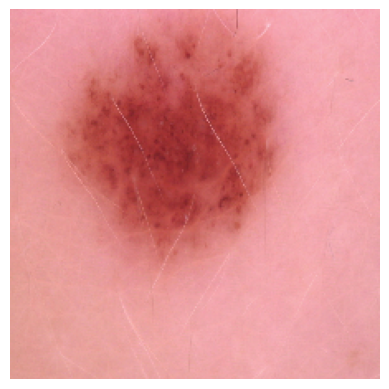

In [8]:
plt.imshow(img)
plt.axis("off")  # Eksenleri kapatalım
plt.show()

In [9]:
# Modeli kullanarak tahminde bulunalım
predictions = net.predict(img_array)

# En yüksek olasılığa sahip sınıfı belirleyelim
predicted_class_index = np.argmax(predictions)

# Olasılık değerlerini alalım
confidence = predictions[0][predicted_class_index]

# Sınıf isimleri (Önceden belirlenen sınıf etiketleri)
image_class = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

# Tahmin edilen sınıfın ismini alalım
predicted_class = image_class[predicted_class_index]

# Sonucu ekrana yazdıralım
print(f"Tahmin Edilen Sınıf: {predicted_class}")
print(f"Doğruluk Oranı: %{confidence * 100:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Tahmin Edilen Sınıf: nv
Doğruluk Oranı: %100.00


HAM10000 veri setinde kullanılan kategoriler cilt lezyonlarıyla ilgilidir ve şu şekilde sınıflandırılmıştır:

- nv	Melanositik nevüs (Ben)	Hayır (İyi huylu)
- mel	Melanom (Cilt kanseri)	Evet (Kötü huylu)
- bkl	Benign keratoz lezyonları (İyi huylu cilt büyümeleri)	Hayır (İyi huylu)
- bcc	Bazal hücreli karsinom	Evet (Düşük riskli cilt kanseri)
- akiec	Aktinik keratoz ve intraepidermal karsinom	Ev(Kanser öncesi veya erken dönem cilt kanseri)
- vasc	Vasküler lezyonlar (Kan damarı ile ilgili büyümeler)	(İyi huylu)
- Dermatofibrom (İyi huylu cilt nodülü)